In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [3]:
def load_xvg_file(filename):
    x, y = [], []
    with open(filename) as f:
        for line in f:
            cols = line.split()
            if len(cols)==2:
                x.append(cols[0])
                y.append(cols[1])
    return np.array(x[1:],dtype=float),np.array(y[1:],dtype=float) #skip the first value (header)

In [14]:
dt= 0.001 # time step 0.002fs, output every 1ps
path = '/Users/fivos/Documents/Projects/2020/02_protein_dynamic_transition/02_simulations/mnt/medium_size/01_LYS/02_Crystal_28_GPU/data/'

### NVT

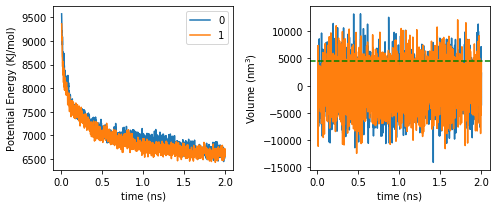

In [15]:
plt.figure(figsize=[7,3])

plt.subplot(1,2,1)
for r in [0,1]:
    filename = "R%d/nvt_potential.xvg"%r
    x,y = load_xvg_file(path+filename)
    plt.plot(x[10:]*dt,y[10:],lw=1.5,label=r)
plt.ylabel('Potential Energy (KJ/mol)')
plt.xlabel('time (ns)')
plt.legend()
#plt.axhline(y=y[-1],ls='--',color='blue')

plt.subplot(1,2,2)
for r in [0,1]:
    filename = "R%d/nvt_volume.xvg"%r
    x,y = load_xvg_file(path+filename)
    plt.plot(x[10:]*dt,y[10:],lw=1.5,label=r)
plt.ylabel(r'Volume (nm$^3$)')
plt.xlabel('time (ns)')
#plt.ylim(590,610)
#plt.xlim(18,20)
plt.axhline(y=y[-1],ls='--',color='green')

plt.tight_layout()
plt.savefig('/Users/fivos/Desktop/fig.png',dpi=300)
plt.show()

### NPT

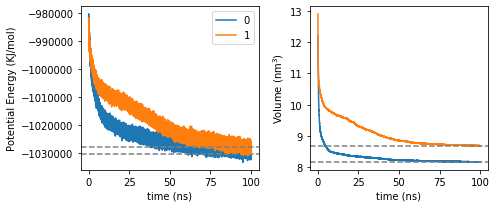

In [31]:
plt.figure(figsize=[7,3])

plt.subplot(1,2,1)
for r in [0,1]:
    filename = "R%d/npt_potential.xvg"%r
    x,y = load_xvg_file(path+filename)
    plt.plot(x[10:]*dt,y[10:],lw=1.5,label=r)
    plt.axhline(y=y[-1],ls='--',color='gray')
plt.ylabel('Potential Energy (KJ/mol)')
plt.xlabel('time (ns)')
plt.legend()


plt.subplot(1,2,2)
for r in [0,1]:
    filename = "R%d/npt_volume.xvg"%r
    x,y = load_xvg_file(path+filename)
    plt.plot(x[10:]*dt,y[10:],lw=1.5,label=r)
    plt.axhline(y=y[-1],ls='--',color='gray')
plt.ylabel(r'Volume (nm$^3$)')
plt.xlabel('time (ns)')
#plt.ylim(8.155,8.175)
#plt.xlim(98,100)

plt.tight_layout()
plt.savefig('/Users/fivos/Desktop/fig.png',dpi=300)
plt.show()

No handles with labels found to put in legend.


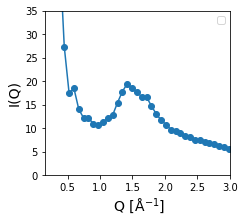

In [38]:
plt.figure(figsize = [3.5,3.2])
filename = "saxs_npt.xvg"
q,Iq = load_xvg_file(path+filename)
plt.plot(q/10,Iq,'-o')
plt.xlabel(r' Q $\rm[\AA^{-1}$]',fontsize=14)
plt.ylabel('I(Q)',fontsize=14)
plt.ylim(0,35)
plt.xlim(0.15,3)
plt.legend()
plt.tight_layout()
plt.savefig('/Users/fivos/Desktop/fig_Iq2.png',dpi=300)
plt.show()

### MD 

No handles with labels found to put in legend.


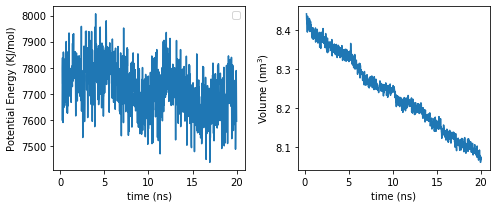

In [44]:
plt.figure(figsize=[7,3])

plt.subplot(1,2,1)

filename = "md_potential.xvg"
x,y = load_xvg_file(path+filename)
plt.plot(x[10:]*dt,y[10:],lw=1.5)
plt.ylabel('Potential Energy (KJ/mol)')
plt.xlabel('time (ns)')
plt.legend()
#plt.axhline(y=y[-1],ls='--',color='blue')

plt.subplot(1,2,2)
filename = "md_volume.xvg"
x,y = load_xvg_file(path+filename)
plt.plot(x[10:]*dt,y[10:],lw=1.5)
plt.ylabel(r'Volume (nm$^3$)')
plt.xlabel('time (ns)')
#plt.ylim(4.55,4.7)
#plt.axhline(y=y[-1],ls='--',color='green')



plt.tight_layout()
plt.savefig('/Users/fivos/Desktop/fig.png',dpi=300)
plt.show()

### X-ray scattering intensity

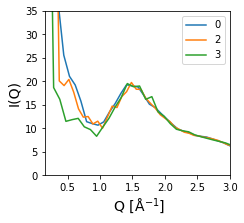

In [17]:
plt.figure(figsize = [3.5,3.2])
for ir in [0,2,3]:
    filename = "R%d/saxs.xvg"%(ir)
    q,Iq = load_xvg_file(path+filename)
    plt.plot(q/10,Iq,label=ir)
plt.xlabel(r' Q $\rm[\AA^{-1}$]',fontsize=14)
plt.ylabel('I(Q)',fontsize=14)
plt.ylim(0,35)
plt.xlim(0.15,3)
plt.legend()
plt.tight_layout()
plt.savefig('/Users/fivos/Desktop/fig_Iq2.png',dpi=300)
plt.show()

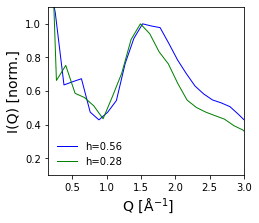

In [55]:
plt.figure(figsize = [3.7,3.2])

Iq_r = np.zeros([2,47])
for ir in range(2):
    filename = "R%d/saxs.xvg"%(ir)
    q,Iq_r[ir] = load_xvg_file(path+filename)
Iq = np.average(Iq_r,axis=0)
#plt.plot(q/10,Iq,c='blue',lw=1,label='h=0.56')
plt.plot(q/10,Iq/Iq[12],c='blue',lw=1,label='h=0.56')
#plt.axvline(x=q[i2]/10,ls='--',c='black',alpha=0.5)

T_ = 300
Iq_r = np.zeros([2,44])
for ir in range(2):
    filename = "R%d/saxs_%d.xvg"%(ir, T_)
    q,Iq_r[ir] = load_xvg_file(path2+filename)
Iq = np.average(Iq_r,axis=0)
dIq = np.std(Iq_r,axis=0)/np.sqrt(3)
#plt.plot(q/10,Iq,'-',lw=1,c='green',label='h=0.28')
plt.plot(q/10,Iq/Iq[11],'-',lw=1,c='green',label='h=0.28')
    #plt.fill_between(q/10, Iq[i]-dIq[i], Iq[i]+dIq[i],color=colors[i])
i2 =11
#plt.axvline(x=q[i2]/10,ls='--',c='black',alpha=0.5)
plt.xlabel(r' Q $\rm[\AA^{-1}$]',fontsize=14)
plt.ylabel('I(Q) [norm.]',fontsize=14)
plt.ylim(0.1,1.1)
#plt.ylim(0.,20)
plt.xlim(0.15,3)
plt.legend(frameon=False,loc='lower left', prop={'size': 10})
plt.tight_layout()

plt.savefig('/Users/fivos/Desktop/fig_Iq2.png',dpi=300)
plt.show()

0.413068 1.78996


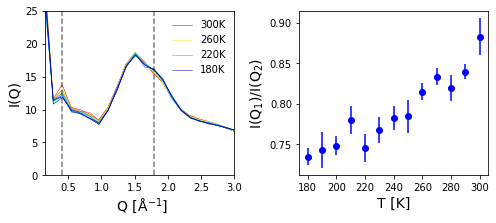

In [23]:
plt.figure(figsize = [7,3.2])
i=12
i1=3
i2=13

T_ = np.arange(180,310,10)
Iq = np.zeros([len(T_),44])
dIq = np.zeros([len(T_),44])
Iq_r = np.zeros([3,44])

colors = plt.cm.jet(np.linspace(0,1,len(T_)+1))

plt.subplot(1,2,1)
for T in np.arange(300,170,-10):
    for ir in range(3):
        filename = "R%d/saxs_%d.xvg"%(ir, T_[i])
        q,Iq_r[ir] = load_xvg_file(path+filename)
        Iq[i] = np.average(Iq_r,axis=0)
        dIq[i] = np.std(Iq_r,axis=0)/np.sqrt(3)
    if i==0 or i==4 or i==8 or i==12:
        plt.plot(q/10,Iq[i],'-',lw=0.5,c=colors[i],label='%dK'%T_[i],markersize=1)
        #plt.fill_between(q/10, Iq[i]-dIq[i], Iq[i]+dIq[i],color=colors[i])
    else:
        plt.plot(q/10,Iq[i],'-',lw=0.5,c=colors[i],markersize=3)
        #plt.fill_between(q/10, Iq[i]-dIq[i], Iq[i]+dIq[i],color=colors[i])
    i-=1
plt.axvline(x=q[i1]/10,ls='--',c='black',alpha=0.5)
plt.axvline(x=q[i2]/10,ls='--',c='black',alpha=0.5)

print(q[i1]/10,q[i2]/10)

plt.xlabel(r' Q $\rm[\AA^{-1}$]',fontsize=14)
plt.ylabel('I(Q)',fontsize=14)
plt.ylim(0,25)
plt.xlim(0.15,3)
plt.legend(frameon=False,loc='upper right', prop={'size': 10})

plt.subplot(1,2,2)
plt.plot(T_,Iq[:,i1]/Iq[:,i2],'o',c='blue')

# error propagation
s1 = dIq[:,i1]/Iq[:,i1]
s2 = dIq[:,i2]/Iq[:,i2]
R = Iq[:,i1]/Iq[:,i2]
dR = np.sqrt(s1*s1+s2*s2)
error = R*dR
    
plt.errorbar(T_,Iq[:,i1]/Iq[:,i2], yerr = error ,c='blue',fmt='o',markersize=4)
plt.ylabel(r'$\rm I(Q_1)/I(Q_2)$',fontsize=14)
plt.xlabel(r'T [K]',fontsize=14)
plt.xticks(np.arange(180,310,20))
#plt.ylim(0.68,0.95)
plt.tight_layout()

plt.savefig('/Users/fivos/Desktop/fig_Iq.png',dpi=300)
plt.show()
#plt.axhline(y=y[-1],ls='--',color='blue')